In [2]:
import pandas as pd ### for importing pandas package
import numpy as np  #### for importing numpy package
import seaborn as sb ### for importing seaborn(graphical representation)

In [3]:
rounds=pd.read_csv('rounds2.csv',encoding="ANSI") #### importing file from excel
rounds.head(2) ### printing'rounds2.csv',encoding="ANSI"

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN


In [4]:
companies=pd.read_csv("companies.txt",sep="\t",encoding="ANSI")
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


#### How many unique companies are present in rounds2?

In [5]:
rounds['company_permalink']=rounds['company_permalink'].str.lower()
rounds['company_permalink'].nunique()

66368

#### How many unique companies are present in companies?

In [6]:
companies['permalink'].nunique()

66368

#### In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.

In [7]:
rounds['company_permalink']=rounds['company_permalink'].str.replace('/organization/',' ')
rounds['company_permalink']=rounds['company_permalink'].str.replace('-',' ')
rounds['company_name']=rounds['company_permalink']
rounds.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter


#### Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N

#### no

#### Merge the two data frames so that all variables (columns) in thecompanies frame are added to the rounds2 data frame. Name themerged frame master_frame. How many observations are present in master_frame?

In [10]:
companies['permalink']=companies['permalink'].str.replace('/organization/',' ')
companies['permalink']=companies['permalink'].str.replace('-',' ')
companies['company_name']=companies['permalink']
companies.head(2)

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,company_name
0,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,fame
1,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,qounter


In [11]:
master_frame=pd.merge(rounds,companies,how='inner',on='company_name')
master_frame.head(2)

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014


#### Calculate the most representative value of the investment amount foreach of the four funding types (venture, angel, seed, and private equity) and report the answers in the template provided on the previous page

In [12]:
funding_type = master_frame[((master_frame["funding_round_type"]=="seed")|
                            (master_frame["funding_round_type"]=="private_equity")|
                            (master_frame["funding_round_type"]=="angel")|
                            (master_frame["funding_round_type"]=="venture"))]
funding_type.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,qounter,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,the one of them inc,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,the one of them inc,the one of them inc,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,0 6 com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0 6 com,0 6 com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007


#### Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Teclov?

In [13]:
funds= funding_type.groupby("funding_round_type")["raised_amount_usd"].mean().reset_index()
funds["raised_amount_usd"]=funds["raised_amount_usd"].astype('int64')
funds

,funding_round_type,raised_amount_usd
0,angel,958694
1,private_equity,73308593
2,seed,719817
3,venture,11748949


### Country data

In [14]:
funds_1=funding_type.groupby('country_code')['raised_amount_usd'].sum().reset_index()
funds_1['raised_amount_usd'].max()

511268539172.0

#### Teclov wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

In [75]:
top9=master_frame[master_frame['funding_round_type']=='venture']         #     *********************
top9=top9.groupby('country_code')[['raised_amount_usd']].sum().astype('int64')
top9=top9.sort_values(by='raised_amount_usd',ascending=False)
top9=top9.head(9)          #top nine countries

top9

,raised_amount_usd
country_code,
USA,422510842796
CHN,39835418773
GBR,20245627416
IND,14391858718
CAN,9583332317
FRA,7259536732
ISR,6907514579
DEU,6346959822
JPN,3363676611


#### For the chosen investment type, make a data frame named top9 with the topnine countries (based on the total investment amount each country has received)

In [76]:
english_speaking_countries=top9.iloc[[0,2,4],[0]]
indexed= ["1.Top English-speaking country","2.Second English-speaking country",
                                              "3.Third English-speaking country"]
english_speaking_countries.index = indexed

english_speaking_countries

,raised_amount_usd
1.Top English-speaking country,422510842796
2.Second English-speaking country,20245627416
3.Third English-speaking country,9583332317


#### Identify the top three English-speaking countries in the data frame top9.

In [77]:
top3=top9.reset_index()
top3.columns=['country_code','raised_amount_usd']
top3=top3[(top3.country_code=='USA') |
          (top3.country_code=='GBR') |
          (top3.country_code=='CAN')]
top3

,country_code,raised_amount_usd
0,USA,422510842796
2,GBR,20245627416
4,CAN,9583332317


### sector analysis

In [28]:
import pandas as pd
sectors=pd.read_csv('mapping.csv')
sectors.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [43]:
# 1. Extract the primary sector of each category list from the category_list column
master_frame1=master_frame
master_frame1['primary_sector']=master_frame1.category_list.str.split('|',expand=True)[0]
master_frame1.head()


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
1,qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,qounter,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
2,qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,qounter,qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,the one of them inc,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,the one of them inc,the one of them inc,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,0 6 com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,0 6 com,0 6 com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web


In [44]:
# 2. Use the mapping file 'mapping.csv' to map each primary sector to one of the eight main sectors 
# (Note that ‘Others’ is also considered one of the main sectors)
sectorss = pd.read_csv('mapping.csv',encoding='ansi')

sectors_mainsector =(sectorss [sectorss ==1].set_index('category_list') 
        .stack().reset_index()
        .drop(0,1))

sectors_mainsector.head()

,category_list,level_1
0,NaN,Blanks
1,NaN,Manufacturing
2,NaN,Manufacturing
3,NaN,Manufacturing
4,NaN,"Social, Finance, Analytics, Advertising"


In [45]:
sectors=sectors[['main_sector','primary_sector']]
sectors=sectors[sectors['main_sector']!='Blanks'][['main_sector','primary_sector']]
sectors.head()

,main_sector,primary_sector
1,Manufacturing,3D
2,Manufacturing,3D Printing
3,Manufacturing,3D Technology
4,"Social, Finance, Analytics, Advertising",Accounting
5,Health,Active Lifestyle


In [46]:
merged_file=master_frame1.merge(sectors,on=['primary_sector'])
merged_file


,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector
0,fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,fame,fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media,Entertainment
1,90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
2,90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
3,90min,/funding-round/fd4b15e8c97ee2ffc0acccdbe1a98810,venture,NaN,26-03-2014,18000000.0,90min,90min,90min,http://www.90min.com,Media|News|Publishing|Soccer|Sports,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment
4,a b productions,/funding-round/23bab180ab73f0dcc3f555bebdf89ade,debt_financing,NaN,21-01-2014,NaN,a b productions,a b productions,A.B Productions,NaN,Media|Music|News,operating,USA,CA,Los Angeles,Los Angeles,11-12-2012,Media,Entertainment
5,a dance for me,/funding-round/9ab9dbd17bf010c79d8415b2c22be6fa,equity_crowdfunding,NaN,26-03-2014,1090000.0,a dance for me,a dance for me,A Dance for Me,http://www.adanceforme.com/,Media|News|Photo Sharing|Video,operating,USA,MT,Missoula,Missoula,31-07-2011,Media,Entertainment
6,ace film productions,/funding-round/c855cb74f332d72871901e140821509e,equity_crowdfunding,NaN,23-01-2012,NaN,ace film productions,ace film productions,ACE Film Productions,NaN,Media|News,operating,USA,NJ,Newark,Newark,01-06-2011,Media,Entertainment
7,action audio apps,/funding-round/1c944693d17e52a50157cf5aa4c13687,equity_crowdfunding,NaN,27-02-2015,NaN,action audio apps,action audio apps,Action Audio Apps,http://actionaudioapps.net/,Media|News,operating,USA,NY,NY - Other,Pleasantville,12-06-2012,Media,Entertainment
8,akira mobile,/funding-round/bfb170aea580e381e5b1810c87855c9e,seed,NaN,01-08-2012,18410.0,akira mobile,akira mobile,Akira Mobile,http://www.akira.lt/en,Media|Mobile|SMS|Telecommunications,operating,LTU,NaN,NaN,NaN,NaN,Media,Entertainment
9,all day media,/funding-round/2760c0426a124b84c540bd4fd2dfe6e5,seed,NaN,16-12-2014,2000000.0,all day media,all day media,ALL DAY MEDIA,http://allday.com/,Media|Social Media,operating,USA,CA,Los Angeles,Los Angeles,01-01-2013,Media,Entertainment


In [47]:
backed_up_file=merged_file

### Sector Analysis 2

In [ ]:
# 1. Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of 
# funding type FT falling within the 5-15
# million USD range. The three data frames should contain:

In [51]:
d1=merged_file[((merged_file['funding_round_type']=='venture') & 
               (merged_file['country_code']=='USA') &
                (merged_file['raised_amount_usd']>=5000000) & (merged_file['raised_amount_usd']<=15000000) )
                ]
d1_temp=d1.groupby('main_sector')[['raised_amount_usd']].agg(['count','sum'])
d1_temp.columns=['total_number','total_amount']
d1=d1.merge(d1_temp,on='main_sector')


d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount
0,all def digital,/funding-round/452a2342fe720285c3b92e9bd927d9ba,venture,A,06-08-2014,5000000.0,all def digital,all def digital,All Def Digital,http://alldefdigital.com,...,operating,USA,CA,Los Angeles,Los Angeles,NaN,Media,Entertainment,580,5.000213e+09
1,chefs feed,/funding-round/adca195749ae9ace84684723fbe75e5b,venture,A,26-02-2015,5000000.0,chefs feed,chefs feed,ChefsFeed,http://www.chefsfeed.com,...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Media,Entertainment,580,5.000213e+09
2,huffingtonpost,/funding-round/7f05940c4d2dfecb8e50a0e5720e5065,venture,A,01-08-2006,5000000.0,huffingtonpost,huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,...,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5.000213e+09
3,huffingtonpost,/funding-round/9241ae16e08df17ebdc064e49e23035a,venture,B,01-09-2007,5000000.0,huffingtonpost,huffingtonpost,The Huffington Post,http://www.huffingtonpost.com,...,acquired,USA,NY,New York City,New York,09-05-2005,Media,Entertainment,580,5.000213e+09
4,matchmine,/funding-round/41ac526630da57ad6eb9d02431b17657,venture,A,01-09-2007,10000000.0,matchmine,matchmine,MatchMine,http://matchmine.com,...,closed,USA,MA,Boston,Needham,01-01-2007,Media,Entertainment,580,5.000213e+09


In [49]:
d1_i=d1_temp.sort_values(by='total_number',ascending=False).reset_index()
d1_i

d1_a=d1_temp.sort_values(by='total_amount',ascending=False).reset_index()
d1_a


,main_sector,total_number,total_amount
0,Others,2923,2.608928e+10
1,Cleantech / Semiconductors,2297,2.118100e+10
2,"Social, Finance, Analytics, Advertising",1912,1.668070e+10
3,"News, Search and Messaging",1563,1.379682e+10
4,Health,908,8.200859e+09
5,Manufacturing,799,7.258553e+09
6,Entertainment,580,5.000213e+09
7,Automotive & Sports,167,1.454104e+09


In [52]:
d2=merged_file[((merged_file['funding_round_type']=='venture') & 
               (merged_file['country_code']=='GBR') &
                (merged_file['raised_amount_usd']>=5000000) & (merged_file['raised_amount_usd']<=15000000) )
                ]
d2_temp=d2.groupby('main_sector')[['raised_amount_usd']].agg(['count','sum'])
d2_temp.columns=['total_number','total_amount']
d2=d2.merge(d2_temp,on='main_sector')

d2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount
0,90min,/funding-round/21a2cbf6f2fb2a1c2a61e04bf930dfe6,venture,NaN,06-10-2015,15000000.0,90min,90min,90min,http://www.90min.com,...,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461511059.0
1,90min,/funding-round/bd626ed022f5c66574b1afe234f3c90d,venture,NaN,07-05-2013,5800000.0,90min,90min,90min,http://www.90min.com,...,operating,GBR,H9,London,London,01-01-2011,Media,Entertainment,54,461511059.0
2,eutechnyx,/funding-round/d2fc787fbc5e4f468dff8b2c557993f1,venture,A,13-05-2010,8800000.0,eutechnyx,eutechnyx,Eutechnyx,http://press.eutechnyx.com,...,operating,GBR,E5,Gateshead,Gateshead,01-01-1987,Games,Entertainment,54,461511059.0
3,mind candy,/funding-round/47df01ed44d7b5916159051e5e32391e,venture,B,01-06-2011,10000000.0,mind candy,mind candy,Mind Candy,http://www.mindcandy.com,...,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461511059.0
4,mind candy,/funding-round/c6a873b4cbdd7ea3d023a771bd3b2f99,venture,A,23-11-2006,10860000.0,mind candy,mind candy,Mind Candy,http://www.mindcandy.com,...,operating,GBR,H9,London,London,01-01-2003,Games,Entertainment,54,461511059.0


In [53]:
d2_i=d2_temp.sort_values(by='total_number',ascending=False).reset_index()
d2_i

# Top investments from mainsector: Cleantech / Semiconductors - 107
d2_a=d2_temp.sort_values(by='total_amount',ascending=False).reset_index()
d2_a

# Top amount from mainsector: Cleantech / Semiconductors - 942829246.0

,main_sector,total_number,total_amount
0,Others,143,1.249124e+09
1,Cleantech / Semiconductors,127,1.136905e+09
2,"Social, Finance, Analytics, Advertising",98,8.218884e+08
3,"News, Search and Messaging",73,6.157462e+08
4,Entertainment,54,4.615111e+08
5,Manufacturing,42,3.619403e+08
6,Health,24,2.145375e+08
7,Automotive & Sports,16,1.670516e+08


In [55]:
d3=merged_file[((merged_file['funding_round_type']=='venture') & 
               (merged_file['country_code']=='CAN') &
                (merged_file['raised_amount_usd']>=5000000) & (merged_file['raised_amount_usd']<=15000000) )
                ]
d3_temp=d3.groupby('main_sector')[['raised_amount_usd']].agg(['count','sum'])
d3_temp.columns=['total_number','total_amount']
d3=d3.merge(d3_temp,on='main_sector')

d3=d3[d3.main_sector !='Blank']
d3.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,company_name,permalink,name,homepage_url,...,status,country_code,state_code,region,city,founded_at,primary_sector,main_sector,total_number,total_amount
0,500px,/funding-round/344b1e2b60ff76f4548c69ea7c04901f,venture,A,07-08-2013,8800000.0,500px,500px,500px,http://500px.com,...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",46,420121113.0
1,500px,/funding-round/36b2c6975d20b602b5d9ea9724e383ea,venture,B,21-07-2015,13000000.0,500px,500px,500px,http://500px.com,...,operating,CAN,ON,Toronto,Toronto,01-10-2009,Apps,"News, Search and Messaging",46,420121113.0
2,polar me,/funding-round/8306cc4e0122a91a0803cb5755be62e0,venture,NaN,23-01-2012,6000000.0,polar me,polar me,Polar,http://www.polar.me,...,operating,CAN,ON,Toronto,Toronto,01-11-2007,Apps,"News, Search and Messaging",46,420121113.0
3,bitstrips,/funding-round/f495741fc9c3b54a87b0ff0b808d70c0,venture,B,29-10-2014,8000000.0,bitstrips,bitstrips,Bitstrips,http://www.bitstrips.com,...,operating,CAN,ON,Toronto,Toronto,19-10-2007,Curated Web,"News, Search and Messaging",46,420121113.0
4,casero,/funding-round/ae5a91d6dfef3f965d3d412b7714b8b4,venture,A,16-12-2004,7500000.0,casero,casero,Casero,http://www.casero.com,...,acquired,CAN,ON,Toronto,Toronto,01-01-2002,Curated Web,"News, Search and Messaging",46,420121113.0


In [56]:
d3_i=d3_temp.sort_values(by='total_number',ascending=False).reset_index()
d3_i

# Top investments from mainsector: Cleantech / Semiconductors - 95
d3_a=d3_temp.sort_values(by='total_amount',ascending=False).reset_index()
d3_a

# Top amount from mainsector: Cleantech / Semiconductors - 850032123.0

,main_sector,total_number,total_amount
0,Cleantech / Semiconductors,112,1.015888e+09
1,Others,109,9.261380e+08
2,"Social, Finance, Analytics, Advertising",52,4.433431e+08
3,"News, Search and Messaging",46,4.201211e+08
4,Manufacturing,31,2.376331e+08
5,Health,20,1.621451e+08
6,Entertainment,22,1.540221e+08
7,Automotive & Sports,2,1.500000e+07


In [ ]:
# Sector-wise Investment Analysis table

In [57]:
import pandas as pd
country1=pd.Series([])
country1[0]= d1_i.total_number.sum()
country1[1]= d1_a.total_amount.sum()
c=d1_i['main_sector'].head(3)
country1[2]=c[0]
country1[3]=c[1]
country1[4]=c[2]
c=d1_i['total_number'].head(3)
country1[5]=c[0]
country1[6]=c[1]
country1[7]=c[2]
c=d1[d1.main_sector==country1[2]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country1[8]=c[0]

c=d1[d1.main_sector==country1[3]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country1[9]=c[0]
country1


0                                      11149
1                                9.96615e+10
2                                     Others
3                 Cleantech / Semiconductors
4    Social, Finance, Analytics, Advertising
5                                       2923
6                                       2297
7                                       1912
8                            zuniversity com
9                                     zystor
dtype: object

In [58]:
country2=pd.Series([])
country2[0]= d2_i.total_number.sum()
country2[1]= d2_a.total_amount.sum()
c=d2_i['main_sector'].head(3)
country2[2]=c[0]
country2[3]=c[1]
country2[4]=c[2]
c=d2_i['total_number'].head(3)
country2[5]=c[0]
country2[6]=c[1]
country2[7]=c[2]
c=d2[d2.main_sector==country2[2]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country2[8]=c[0]

c=d2[d2.main_sector==country2[3]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country2[9]=c[0]
country2

0                                        577
1                                 5.0287e+09
2                                     Others
3                 Cleantech / Semiconductors
4    Social, Finance, Analytics, Advertising
5                                        143
6                                        127
7                                         98
8                                    zynstra
9                              ziarco pharma
dtype: object

In [59]:
country3=pd.Series([])
country3[0]= d3_i.total_number.sum()
country3[1]= d3_a.total_amount.sum()
c=d3_i['main_sector'].head(3)
country3[2]=c[0]
country3[3]=c[1]
country3[4]=c[2]
c=d3_i['total_number'].head(3)
country3[5]=c[0]
country3[6]=c[1]
country3[7]=c[2]
c=d3[d3.main_sector==country3[2]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country3[8]=c[0]

c=d3[d3.main_sector==country3[3]]
c=c.groupby('permalink')['permalink'].agg(['count']).reset_index().max()
country3[9]=c[0]
country3

0                                        394
1                                3.37429e+09
2                 Cleantech / Semiconductors
3                                     Others
4    Social, Finance, Analytics, Advertising
5                                        112
6                                        109
7                                         52
8                                  zymeworks
9                             zeugma systems
dtype: object

In [60]:
final_table=pd.concat([country1,country2,country3],axis=1)
final_table.columns=('USA','GBR','CAN')
final_table.index=['Total number of investments','Total amount of investment',
                   'Top sector-based on count of investments',' Second-best sector',
                   'Third-best sector','Number of investments in the top sector', 
                   'Number of investments in the second-best sector',
                  ' Number of investments in the third-best sector',
                  'company received the highest investment',
                  'company received the highestinvestment']
final_table

,USA,GBR,CAN
Total number of investments,11149,577,394
Total amount of investment,9.96615e+10,5.0287e+09,3.37429e+09
Top sector-based on count of investments,Others,Others,Cleantech / Semiconductors
Second-best sector,Cleantech / Semiconductors,Cleantech / Semiconductors,Others
Third-best sector,"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising"
Number of investments in the top sector,2923,143,112
Number of investments in the second-best sector,2297,127,109
Number of investments in the third-best sector,1912,98,52
company received the highest investment,zuniversity com,zynstra,zymeworks
company received the highestinvestment,zystor,ziarco pharma,zeugma systems


In [ ]:
# 1. A plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
# and the average amount of investment in each funding type. This chart should make it clear that a certain funding type 
# (FT) is best suited for Teclov

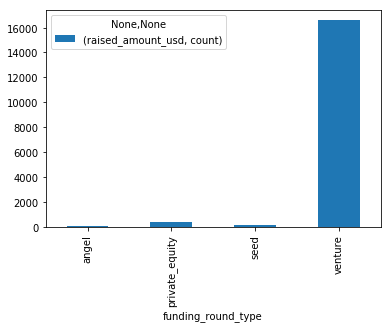

In [61]:
m1=master_frame[((master_frame.funding_round_type=='venture') | 
               (master_frame.funding_round_type=='angel') | 
               (master_frame.funding_round_type=='seed')|
               (master_frame.funding_round_type=='private_equity'))]
m1=m1[(m1['raised_amount_usd']>=5000000) & (m1['raised_amount_usd']<=15000000)][['funding_round_type','raised_amount_usd']]
m1.groupby('funding_round_type')[['raised_amount_usd']].agg(['count']).plot(kind='bar')

In [ ]:
# 2. A plot showing the top 9 countries against the total amount of investments of funding type FT. 
# This should make the top 3 countries (Country 1, Country 2,and Country 3) very clear

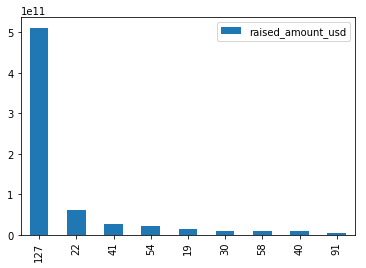

In [68]:
top9.plot(kind='bar')


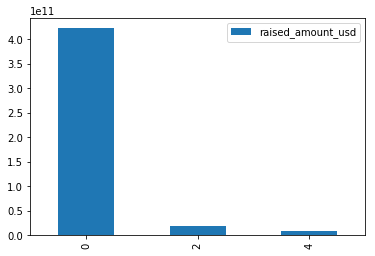

In [78]:
top3.plot(kind='bar')

Text(0.5, 0, "['USA']")

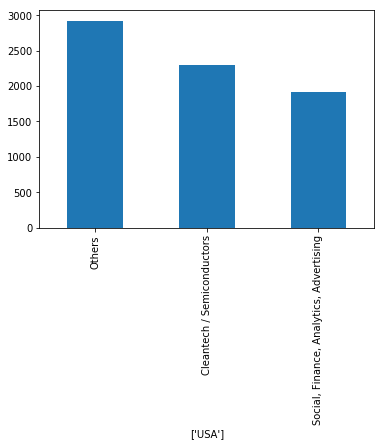

In [79]:
# 3. A plot showing the number of investments in the top 3 sectors of the top 3countries on one chart 
# (for the chosen investment type FT). 


# 3 countries: USA, GBR, CAN
# top 3 sectors

ft=final_table.iloc[5:8,0].plot(kind='bar')
ft.set_xticklabels(final_table.iloc[2:5,0])
ft.set_xlabel(['USA'])

Text(0.5, 17.19999999999999, "['GBR']")

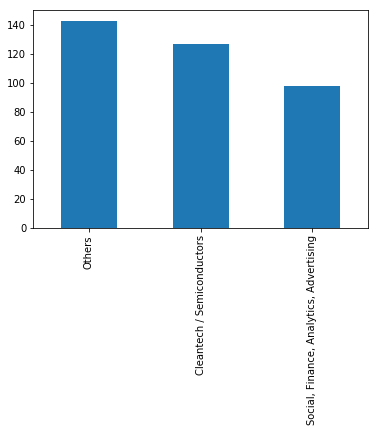

In [80]:
ft1=final_table.iloc[5:8,1].plot(kind='bar')
ft1.set_xticklabels(final_table.iloc[2:5,1])
ft.set_xlabel(['GBR'])

Text(0.5, 3.1999999999999886, "['CAN']")

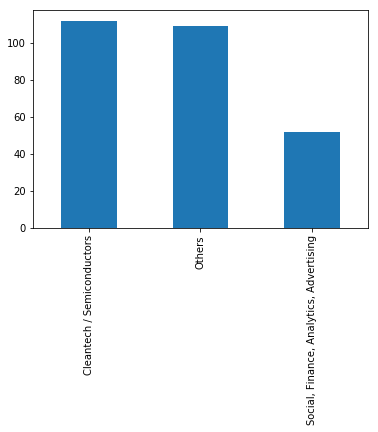

In [82]:
ft2=final_table.iloc[5:8,2].plot(kind='bar')
ft2.set_xticklabels(final_table.iloc[2:5,2])
ft1.set_xlabel(['CAN'])